In [1]:
import os
import numpy as np
import emilys.image.shift as sh
import matplotlib.pyplot as plt
import emilys.image.arrayplot as aplt
#%matplotlib inline

In [2]:
sworkdir = r'C:\Data\Python\data\PICO\stab\200_190211_1'

In [9]:
sfpre = 'img_' # image name prefic
sfsuf = '.raw' # image name suffix
nimg0 = 1 # first image index
nimgn = 862 # last image index
nidx = 0 # number of digits used in the file name for an index
nbin = 4 # detector binning
dx = 0.036857 * nbin # detector pixel size (x) [nm]
dy = 0.036857 * nbin # detector pixel size (y) [nm]
dt = 2.06 # time per aquisition [s]
nx = 512 # number of pixels (x)
ny = 512 # number of pixels (y)
datatype = np.uint16
def get_ser_file_name(idx, swd, spre, ssuf, ndig=0):
    return os.path.join(swd, spre + '{:0{n}d}'.format(idx, n = ndig) + ssuf)

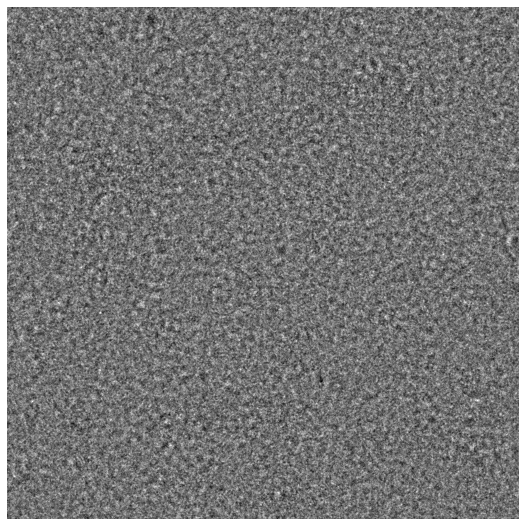

In [10]:
# load and show one example image
idx = 35
sfile = get_ser_file_name(idx, sworkdir, sfpre, sfsuf, nidx)
aimg = np.fromfile(sfile, dtype=datatype).astype(np.float32).reshape((ny,nx))
paimg = aplt.arrayplot2d(aimg,1)

In [41]:
# load first first reference
idx = nimg0
sfile = sfile = get_ser_file_name(idx, sworkdir, sfpre, sfsuf, nidx)
aref = np.fromfile(sfile, dtype=datatype).astype(np.float32).reshape((ny,nx))
# measure image-to-image shift in a series
ash0 = np.zeros((nimgn-nimg0+2,2))
ash1 = np.zeros((nimgn-nimg0+2,2))
ash2 = np.zeros((nimgn-nimg0+2,2))
idx = 0
ssh = np.array([dx,dy])
for i in range(nimg0+1, 100+1):
    # load next image
    sfile = sfile = get_ser_file_name(i, sworkdir, sfpre, sfsuf, nidx)
    aimg = np.fromfile(sfile, dtype=datatype).astype(np.float32).reshape((ny,nx))
    # measure the shift
    lsh0 = sh.get_rigid_shift(aimg, aref, method='pixel', maxshift = 3.)
    lsh1 = sh.get_rigid_shift(aimg, aref, method='com', maxshift = 3.)
    lsh2 = sh.get_rigid_shift(aimg, aref, method='peak', maxshift = 2.5)
    ash0[idx] = lsh0[0][0:2] * ssh
    ash1[idx] = lsh1[0][0:2] * ssh
    ash2[idx] = lsh2[0][0:2] * ssh
    lensh2 = np.sqrt(np.sum(lsh2[0][0:2]**2))
    delta = np.sqrt(np.sum((lsh1[0][0:2]-lsh2[0][0:2])**2))
    print('{:3d}: shift 2 = ({:.3f},{:.3f}),  error = ({:.3f}, {:.3f})'.format(i,lsh2[0][0],lsh2[0][1],lsh2[1][0],lsh2[1][1]))
    #print('{:3d}: shift 2 = {:.3f},  dif.: {:.3f},  rel. dif.: {:.3f}'.format(idx, lensh2, delta, delta/lensh2))
    aref = aimg
    idx += 1

  2: shift 2 = (-0.006,-0.086),  error = (0.004, 0.004)
  3: shift 2 = (0.021,-0.098),  error = (0.004, 0.004)
  4: shift 2 = (-0.021,-0.029),  error = (0.004, 0.004)
  5: shift 2 = (-0.155,-0.027),  error = (0.005, 0.005)
  6: shift 2 = (-0.058,-0.090),  error = (0.005, 0.005)
  7: shift 2 = (-0.211,0.051),  error = (0.005, 0.005)
  8: shift 2 = (0.112,0.004),  error = (0.004, 0.004)
  9: shift 2 = (-0.112,-0.269),  error = (0.005, 0.005)
 10: shift 2 = (-0.044,-0.010),  error = (0.004, 0.004)
 11: shift 2 = (0.151,-0.145),  error = (0.004, 0.004)
 12: shift 2 = (-0.049,-0.040),  error = (0.004, 0.004)
 13: shift 2 = (0.099,-0.002),  error = (0.004, 0.004)
 14: shift 2 = (0.140,-0.080),  error = (0.005, 0.005)
 15: shift 2 = (0.139,0.155),  error = (0.004, 0.004)
 16: shift 2 = (-0.021,-0.306),  error = (0.004, 0.004)
 17: shift 2 = (0.238,-0.042),  error = (0.005, 0.005)
 18: shift 2 = (0.053,-0.115),  error = (0.005, 0.005)
 19: shift 2 = (-0.048,0.011),  error = (0.004, 0.004)
 20:

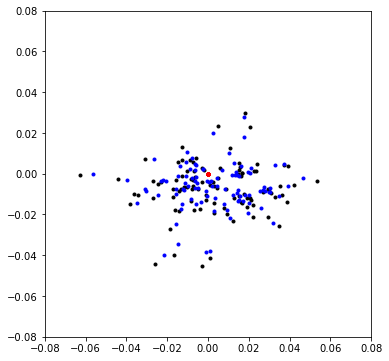

In [42]:
xrng = 0.08
tash0 = ash0.T
tash1 = ash1.T
tash2 = ash2.T
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect(1)
plt.plot(tash2[0],tash2[1],'k.')
plt.plot(tash1[0],tash1[1],'b.')
plt.plot(tash0[0],tash0[1],'r.')
ax.set_xlim(-xrng, xrng)
ax.set_ylim(-xrng, xrng)
plt.show()